In [18]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix
from lps_toolbox.metrics.classification import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle



In [12]:
class_name = ['super','A','B','C','D','AA','AB','DA','DB']
n_folds = 10
batch = 512

files = {}
files_fold = {}
eff_ech_class = {}
file_hier = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{0}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/'.format(batch)

fileSP_begin = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{0}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_'.format(batch)
fileSP_end = '/SP_folds.csv'
best_net_begin = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{0}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_super/fold05/true_predict.csv'.format(batch)

In [13]:
for iclass in class_name:
    files[iclass] = fileSP_begin + iclass + fileSP_end
    file_fold = []
    for ifold in range(n_folds):
        file = fileSP_begin + iclass + '/fold0{0}'.format(ifold) + '/confusion_matrix.csv'
        file_fold.append(file)
    files_fold[iclass] = file_fold

In [14]:
sp_mean = []
sp_std = []
classes = []
for iclass,file in files.iteritems():
    classes.append(iclass)
    sp_mean.append(pd.read_csv(file).apply(np.mean).values[0])
    sp_std.append(pd.read_csv(file).apply(np.std).values[0])
    print "SP of class {0}: {1:.2}+-{2:.1}".format(iclass,pd.read_csv(file).apply(np.mean).values[0],pd.read_csv(file).apply(np.std).values[0])

SP of class A: 0.63+-0.1
SP of class AA: 0.79+-0.07
SP of class C: 0.99+-0.01
SP of class B: 0.95+-0.01
SP of class D: 0.89+-0.07
SP of class DB: 0.96+-0.1
SP of class DA: 0.95+-0.03
SP of class AB: 0.93+-0.05
SP of class super: 0.61+-0.1


['A', 'AA', 'C', 'B', 'D', 'DB', 'DA', 'AB', 'super']
['A', 'AA', 'C', 'B', 'D', 'DB', 'DA', 'AB', 'Super']
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/SP_all_classes_en.png file


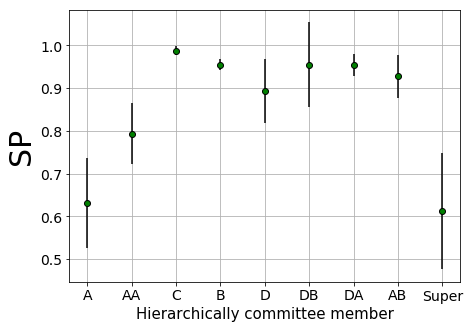

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
print classes
classe_label = classes
if 'super' in classe_label:
    classe_label.remove('super')
    classe_label.append('Super')
print classe_label
plt.errorbar(x=classe_label,y=sp_mean,yerr=sp_std,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=u"SP médio")
plt.grid()
#plt.xlabel("Classes",fontsize=30)
plt.xlabel("Hierarchically committee member",fontsize=15)

plt.ylabel("SP",fontsize=30)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.title(u"SP de cada classe em cada nível da Rede Hierárquica (10 folds)",fontsize=15)
#plt.savefig(file_hier+'SP_all_classes_pt.png')
savefig(plt,filename=file_hier+'SP_all_classes_en.png')

# efficiency of each estimator

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_super/recall_super_en.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_A/recall_A_en.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_B/recall_B_en.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/H

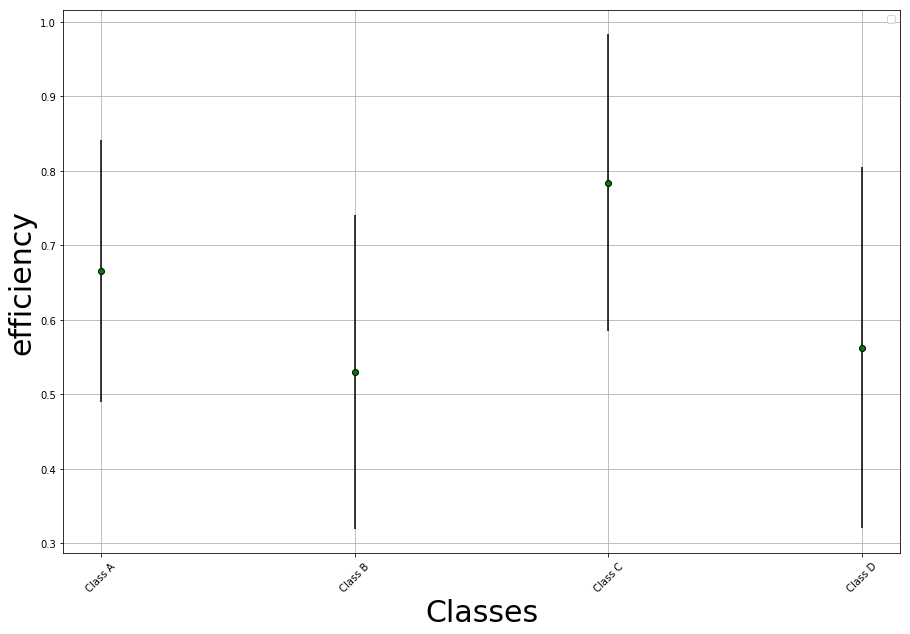

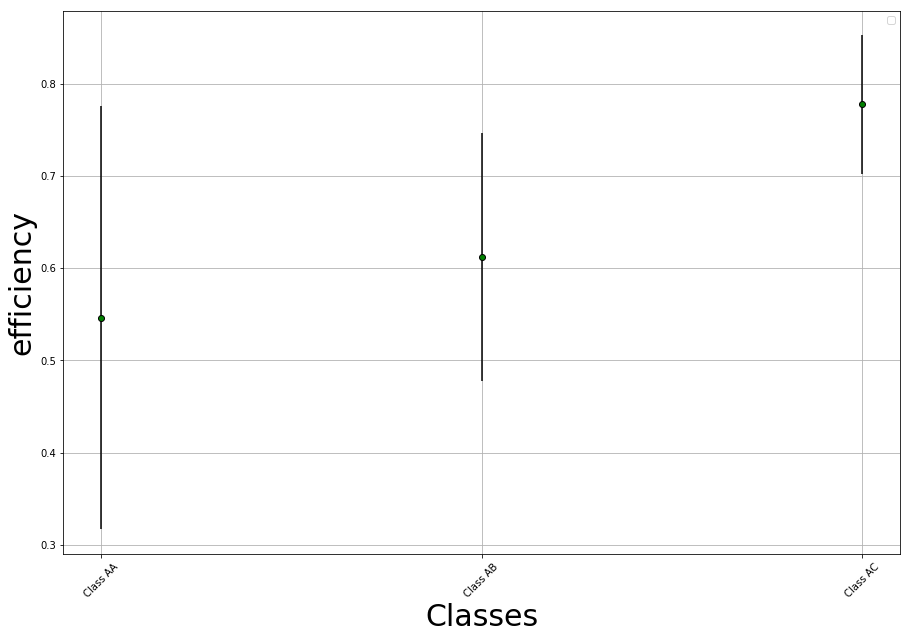

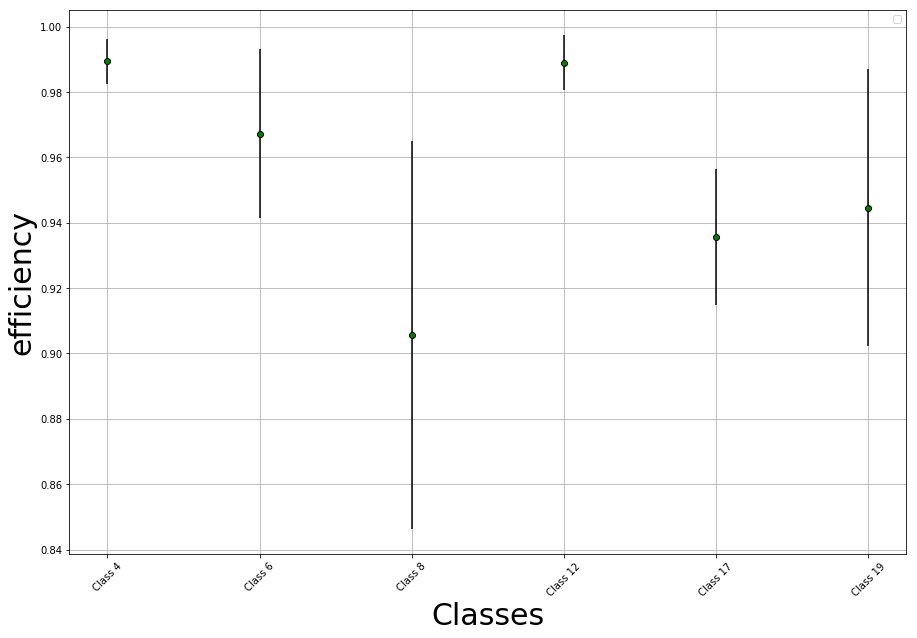

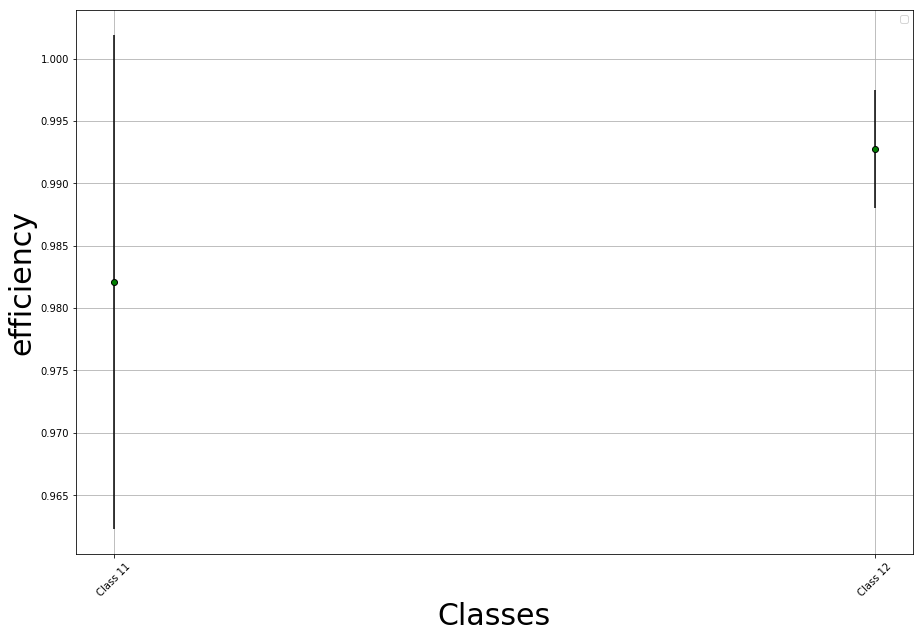

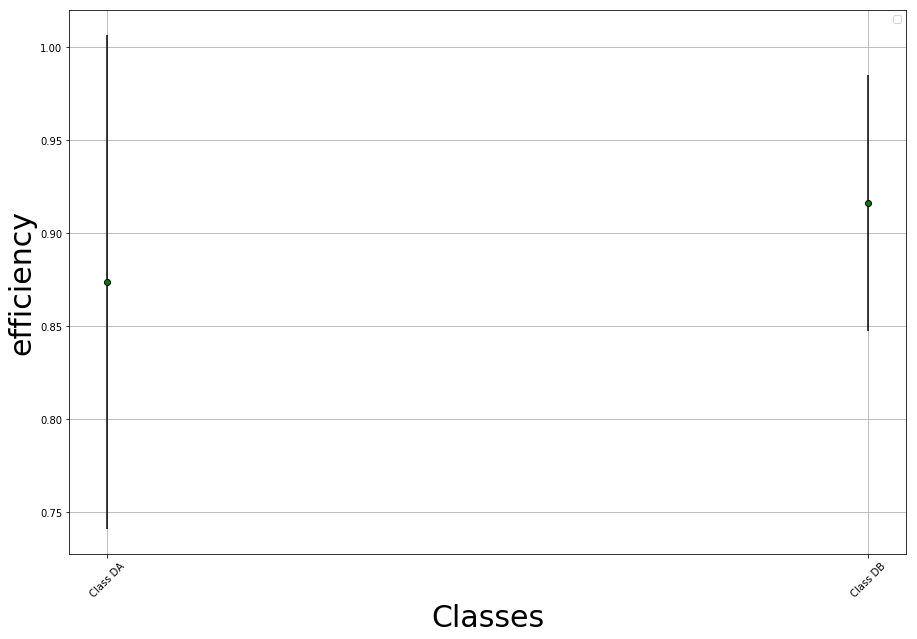

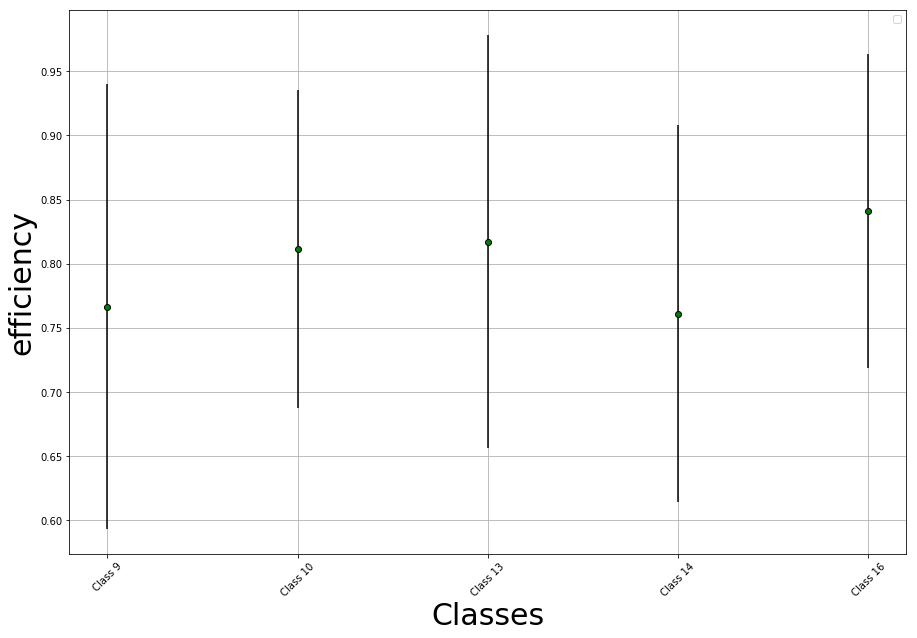

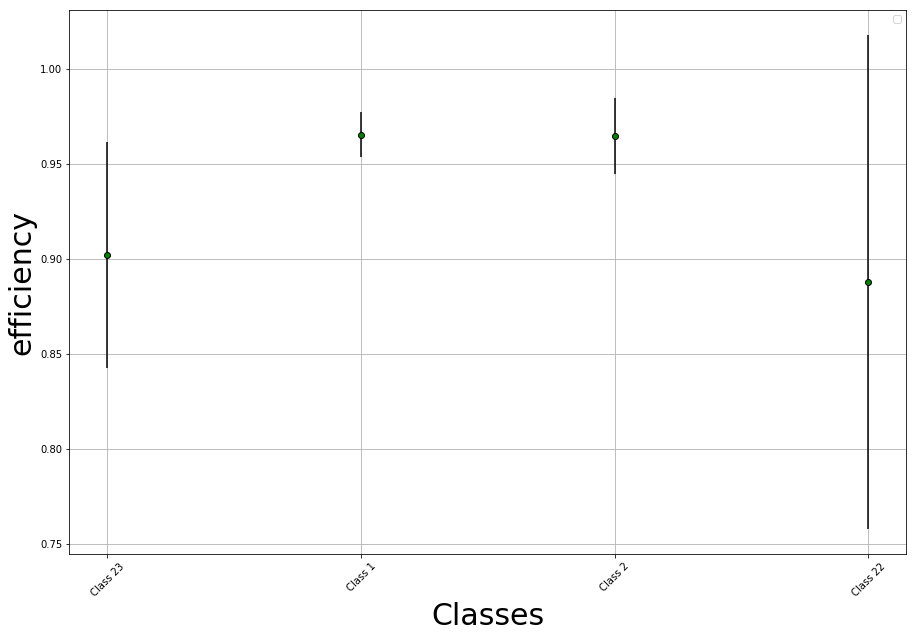

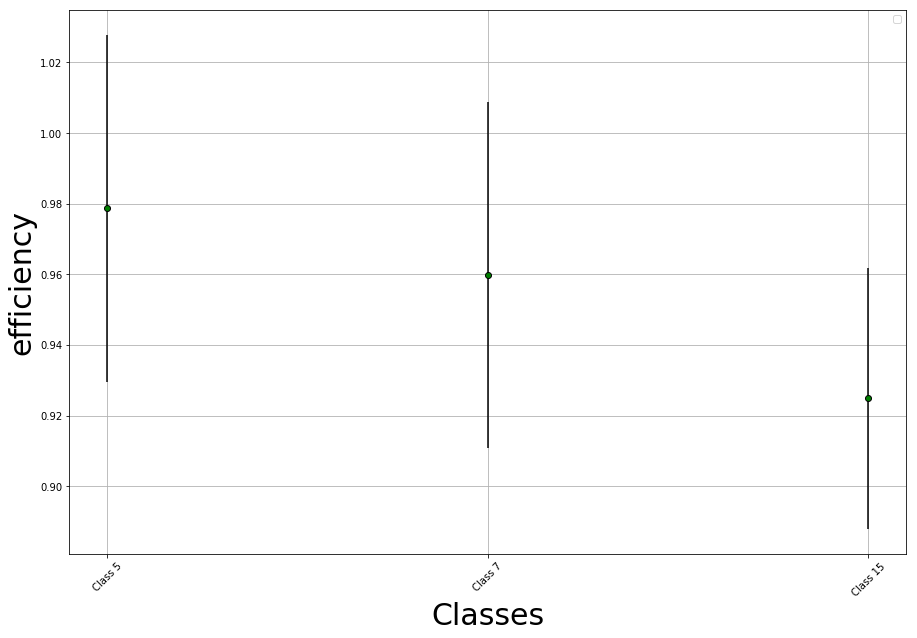

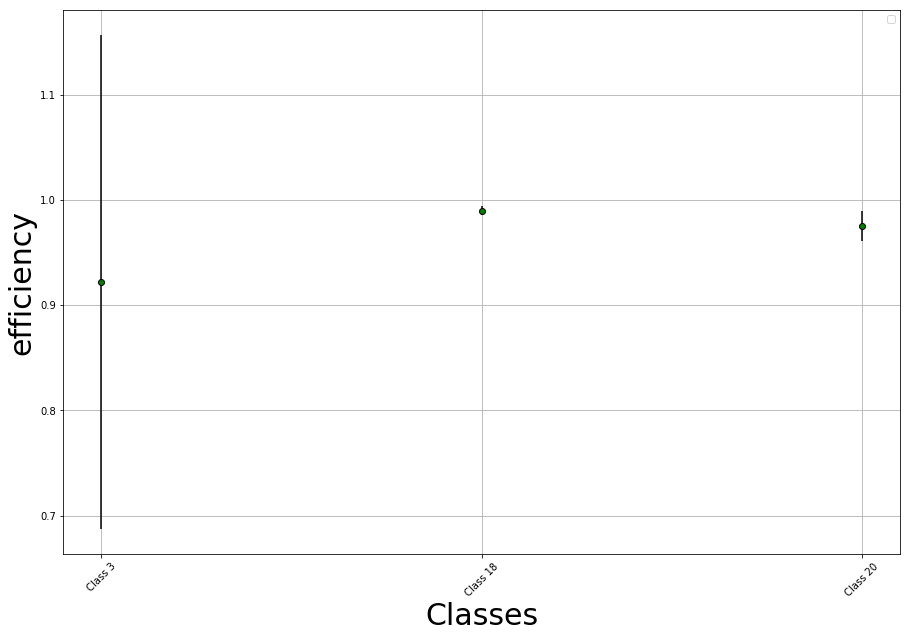

In [19]:
key_all = ['super','A','B','C','D','AA','AB','DA','DB']
classes_all = [['A','B','C','D'],
               ['AA','AB','AC'],
               [4,6,8,12,17,19],
               [11,12],
               ['DA','DB'],
               [9,10,13,14,16],
               [23,1,2,22],
               [5,7,15],
               [3,18,20]]

eff_each_class = {}

for key,classes in zip(key_all,classes_all):
    fold_tosave = fileSP_begin + key +'/'
    cm_folds = np.asarray([pd.read_csv(cmCSV,header=None).values for cmCSV in files_fold[key]])
    cm_norm_folds = np.asarray([ confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis] for confusionMatrix in cm_folds])
    y = cm_norm_folds.mean(axis=0).diagonal()
    yerr = cm_norm_folds.std(axis=0).diagonal()

    eff_each_class[key] = {}
    eff_each_class[key]['eff_mean'] = y
    eff_each_class[key]['eff_std'] = yerr

    fig, ax = plt.subplots(figsize=(15,10))

    plt.errorbar(x=['Class {0}'.format(i) for i in classes],y=y,yerr=yerr,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=None)
    plt.grid()
    plt.xlabel("Classes",fontsize=30)
    plt.xticks(rotation=45)
    plt.ylabel(u"efficiency",fontsize=30)
    #plt.title(u"Resultado da ativação do classe hierarquica utilizando todo o conjunto de dados",fontsize=15)
    plt.legend()
    savefig(plt,fold_tosave +'recall_{0}_en.png'.format(key))
    
# write python dict to a file
output = open(fileSP_begin+'eff_eachClass.pkl', 'wb')
pickle.dump(eff_each_class, output)
output.close()

In [21]:
eff_each_class

{'A': {'eff_mean': array([0.54653718, 0.61201881, 0.77782002]),
  'eff_std': array([0.22993159, 0.13476492, 0.07503837])},
 'AA': {'eff_mean': array([0.76662503, 0.8113021 , 0.81734222, 0.76116044, 0.84116643]),
  'eff_std': array([0.17340944, 0.12382499, 0.1610027 , 0.14676132, 0.12247109])},
 'AB': {'eff_mean': array([0.90188185, 0.96509735, 0.964427  , 0.88762783]),
  'eff_std': array([0.05951755, 0.01188959, 0.0199837 , 0.1300649 ])},
 'B': {'eff_mean': array([0.98938084, 0.96730061, 0.90570919, 0.98903507, 0.93552323,
         0.94467362]),
  'eff_std': array([0.00687607, 0.0258845 , 0.05946809, 0.00844053, 0.02079869,
         0.04245755])},
 'C': {'eff_mean': array([0.98208275, 0.9927628 ]),
  'eff_std': array([0.01981534, 0.00472255])},
 'D': {'eff_mean': array([0.87393102, 0.9161965 ]),
  'eff_std': array([0.13278366, 0.06858092])},
 'DA': {'eff_mean': array([0.97869603, 0.95979667, 0.92487803]),
  'eff_std': array([0.04908215, 0.04892971, 0.03702813])},
 'DB': {'eff_mean': ar

# Confusion Matrix of each Class

In [8]:
classe = 'DB'

print pd.read_csv(files[classe])
all_sp = pd.read_csv(files[classe]).values
best_fold = np.argmax(all_sp)
best_sp = all_sp[best_fold][0]

print "best SP of class {0} (fold 0{1}): {2:.3}".format(classe,best_fold+1,best_sp)

best_net_fold = fileSP_begin + classe + '/fold0' + str(np.argmax(pd.read_csv(files[classe]).values)) 
best_net = best_net_fold+'/true_predict.csv'
print best_net

         SP
0  0.653266
1  0.988593
2  0.979292
3  0.985876
4  0.986179
5  0.988398
6  0.995951
7  0.991349
8  0.995772
9  0.993563
best SP of class DB (fold 07): 0.996
/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_32_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DB/fold06/true_predict.csv


In [9]:
pred = pd.read_csv(best_net,index_col=0)['predict'].values
true = pd.read_csv(best_net,index_col=0)['true'].values

In [111]:
fig, ax = plt.subplots(figsize=(10,10))

plotConfusionMatrix(pred, true, class_labels=['Classe 5', 'Classe 7', 'Classe 15'], ax=ax)


plt.title('Confusion matrix of Class {0} (fold 0{1})'.format(classe,best_fold+1),fontsize=20,fontweight="bold")
fig_cm = best_net_fold + '/confusion_matrix.png'
print fig_cm
#fig.savefig(fig_cm)
savefig(fig,fig_cm)

'DA'

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(true,pred,average=None)

fig, ax = plt.subplots(figsize=(15,10))

plt.errorbar(x=['Class {0:02d}'.format(i+1) for i in range(24)],y=recall,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=None)
plt.grid()
plt.xlabel("Classes",fontsize=30)
plt.xticks(rotation=45)
plt.ylabel(u"efficiency",fontsize=30)
#plt.title(u"Resultado da ativação do classe hierarquica utilizando todo o conjunto de dados",fontsize=15)
plt.legend()
savefig(plt,activation_net_begin +'/recall_each_classes_en.png')

# predict HierarqNet

In [27]:
batch = 512

activation_net_begin = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{0}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(batch)
activation_net = activation_net_begin + '/true_predict.csv'

pred = pd.read_csv(activation_net,index_col=0)['predict'].values
true = pd.read_csv(activation_net,index_col=0)['true'].values

In [28]:
print "SP: {0}".format(sp_index(y_true=true,y_pred= pred))
recall = recall_score(y_true=true,y_pred=pred,average=None)
print "Eff_mean: {0}".format(recall.mean())
print "Eff_std: {0}".format(recall.std())
print ['%.2f'%i for i in recall]

SP: 0.813536178491
Eff_mean: 0.820350210542
Eff_std: 0.138344701291
['0.84', '0.73', '0.90', '0.99', '0.99', '0.95', '0.84', '0.86', '0.67', '0.78', '0.94', '0.79', '0.42', '0.63', '0.95', '0.69', '0.83', '0.97', '0.93', '0.87', '0.67', '0.73', '0.74', '0.98']


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/confusion_matrix_sns.png file


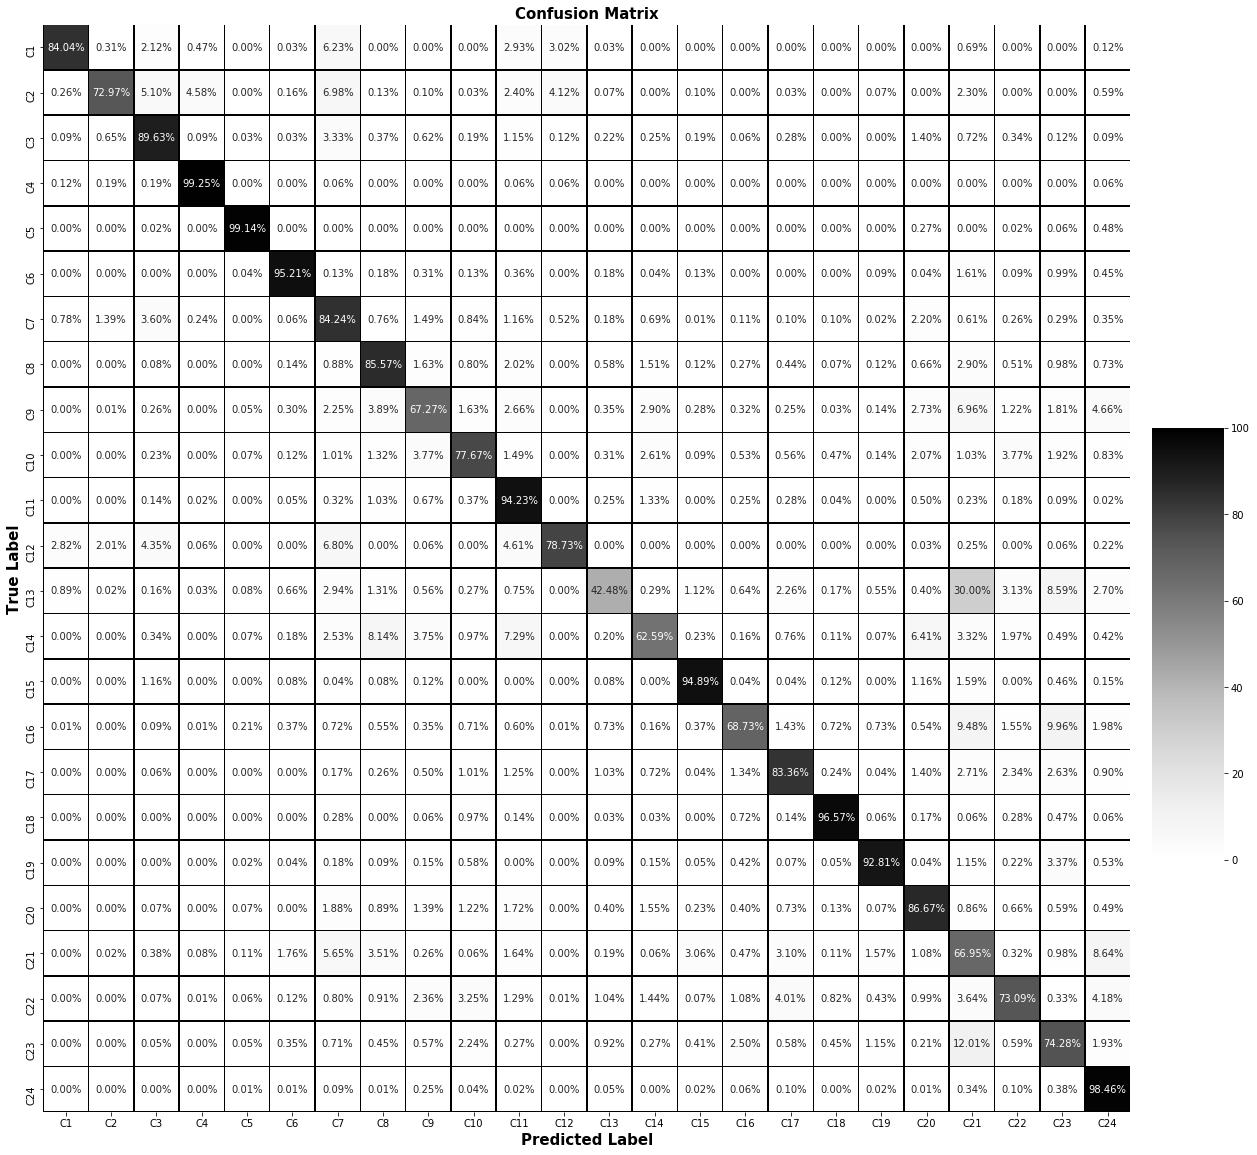

In [25]:
#fig, ax = plt.subplots(figsize=(30,30))

#plotConfusionMatrix(pred, true, class_labels=['Classe {0:02d}'.format(i+1) for i in range(24)], ax=ax)

confusionMatrix = confusion_matrix(y_pred=pred,y_true=true)

cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_aspect(1)

cbar_ax = fig.add_axes([.905, .3, .05, .3])

snsConfusionMatrix(cm_norm=cm_norm,ax=ax,
                   x_labels=['C{0}'.format(i+1) for i in range(24)],
                   y_labels=['C{0}'.format(i+1) for i in range(24)],
                   sns_kwg={'cbar_ax':cbar_ax,'cbar':True})

#plt.title('Confusion matrix of HierarqNet using MLP as estimator',fontsize=20,fontweight="bold")
fig_cm = activation_net_begin + '/confusion_matrix_sns.png'
#fig.savefig(fig_cm)
savefig(fig,fig_cm)

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/recall_each_classes_en.png file


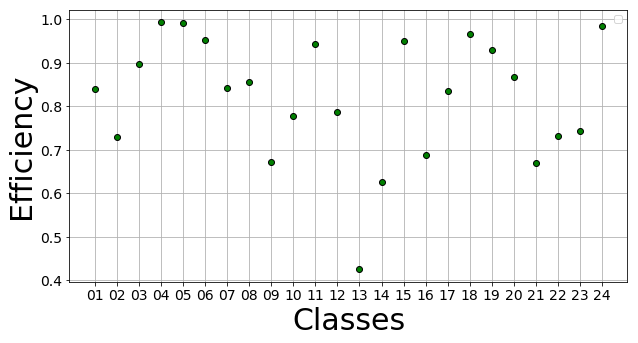

In [26]:
from sklearn.metrics import recall_score

recall = recall_score(true,pred,average=None)

fig, ax = plt.subplots(figsize=(10,5))

plt.errorbar(x=['{0:02d}'.format(i+1) for i in range(24)],y=recall,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=None)
plt.grid()
plt.xlabel("Classes",fontsize=30)
plt.ylabel(u"Efficiency",fontsize=30)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.title(u"Resultado da ativação do classe hierarquica utilizando todo o conjunto de dados",fontsize=15)
plt.legend()
savefig(plt,activation_net_begin +'/recall_each_classes_en.png')